In [1]:
# I want to predict the expected dolar mep value for Argentina for the following 3 months.

# Libraries

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load datasets.

In [3]:
# https://www.rava.com/perfil/DOLAR%20MEP
# Dolar mep
dolar_mep = pd.read_csv('../src/data/dolar_mep.csv', parse_dates=['fecha'])

# Load the dataset.
dolar_mep

,especie,ultimo,variacion,anterior,apertura,minimo,maximo,varMTD,varYTD,var6M,var12M,fecha,hora,cierre,timestamp,volumen
0,DOLAR MEP,36.97,NaN,NaN,36.97,36.97,36.97,NaN,NaN,NaN,NaN,2018-10-29,NaN,36.97,1540782000,0
1,DOLAR MEP,36.63,0.0,0.00,36.63,36.63,36.63,NaN,NaN,NaN,NaN,2018-10-30,19:59,36.63,1540868400,0
2,DOLAR MEP,35.93,0.0,0.00,35.93,35.93,35.93,NaN,NaN,NaN,NaN,2018-10-31,19:59,35.93,1540954800,0
3,DOLAR MEP,35.89,0.0,0.00,35.89,35.89,35.89,NaN,NaN,NaN,NaN,2018-11-01,19:59,35.89,1541041200,0
4,DOLAR MEP,35.66,0.0,0.00,35.66,35.66,35.66,NaN,NaN,NaN,NaN,2018-11-02,19:59,35.66,1541127600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,DOLAR MEP,467.03,0.0,466.98,466.98,466.98,479.60,NaN,NaN,NaN,NaN,2023-06-01,19:59,467.03,1685588400,0
1345,DOLAR MEP,469.09,0.4,467.03,467.03,467.03,477.75,NaN,NaN,NaN,NaN,2023-06-02,19:59,469.09,1685674800,0
1346,DOLAR MEP,472.29,0.7,469.09,469.09,469.09,478.78,NaN,NaN,NaN,NaN,2023-06-05,19:59,472.29,1685934000,0
1347,DOLAR MEP,471.80,-0.1,472.29,472.29,471.80,484.94,NaN,NaN,NaN,NaN,2023-06-06,19:59,471.80,1686020400,0


In [4]:
# https://datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26
# Dolar oficial
dolar_oficial = pd.read_csv('../src/data/cambio_oficial.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
dolar_oficial

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,2023-04-26,227.5,221.5517,221.57,NaN,468.015666,222.57,1642496.0,243.05,1724660.0,270.9,334533.0,299.6,280168.0,356.5,81196.0,394.6,47791.0
7723,2023-04-27,228.5,222.0200,222.00,NaN,460.017422,222.59,1389935.0,242.90,2044085.0,270.9,361842.0,300.1,281104.0,358.0,79750.0,397.5,47729.0
7724,2023-04-28,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0
7725,2023-04-29,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0


In [5]:
# https://datos.gob.ar/series/api/series/?ids=89.2_TS_INTE_PM_0_D_16
# Tasa interes
tasa_interes = pd.read_csv('../src/data/tasa_interes.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
tasa_interes

,indice_tiempo,tasas_interes_call,tasas_interes_badlar,tasas_interes_pm
0,2003-01-02,6.0172,25.3125,NaN
1,2003-01-03,6.0455,21.7500,NaN
2,2003-01-04,6.0455,21.7500,NaN
3,2003-01-05,6.0455,21.7500,NaN
4,2003-01-06,5.9506,20.2500,NaN
...,...,...,...,...
7419,2023-04-26,72.0900,76.3750,81.0
7420,2023-04-27,68.2100,76.2500,91.0
7421,2023-04-28,82.5500,87.5000,91.0
7422,2023-04-29,82.5500,87.5000,91.0


In [6]:
# Series monetarias
series_monetarias = pd.read_csv('../src/data/series_monetarias.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
series_monetarias

,indice_tiempo,reservas_internacionales_bcra_saldos,reservas_internacionales_bcra_prom_mensual_de_saldos_diarios,tipo_de_cambio_moneda_de_cada_momento,tipo_de_cambio_en_pesos_equivalentes,agregados_monetarios_en_pesos_bym_totales,agregados_monetarios_en_pesos_bym_en_circulacion,agregados_monetarios_en_pesos_bym_en_entidades,agregados_monetarios_en_pesos_bm,agregados_monetarios_en_pesos_m1,...,tasa_interes_deposito_plazo_fijo_30_59d_usd,tasa_interes_obligaciones_entidades_financieras_exterior,tasa_interes_prestamos_interfinancieros_hasta_15d_pesos,tasa_interes_prestamos_interfinancieros_hasta_15d_plazo_usd,tasa_interes_prestamos_empresas_primera_linea_30d_pesos,tasa_interes_prestamos_empresas_primera_linea_30d_plazo_usd,tasa_interes_adelantos_en_cc_sect_priv_no_financiero_pesos,tasa_interes_adelantos_en_cc_al_sect_priv_no_financiero_usd,tasa_interes_prestamos_hipot_sect_priv_5_10_anios_pesos,tasa_interes_prestamos_hipotecarios_sect_priv_5_10_anios_usd
0,1940-01-01,492.8,NaN,4.3952,4.395200e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1940-02-01,490.1,NaN,4.3042,4.304200e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1940-03-01,495.4,NaN,4.2805,4.280500e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1940-04-01,494.9,NaN,4.3514,4.351400e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1940-05-01,496.5,NaN,4.4167,4.416700e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2022-11-01,38008.9,37897.116667,167.2550,1.672550e+02,3428839.0,3052613.0,376226.0,4507746.0,7202245.0,...,0.337072,65.90,74.51,61.22,NaN,NaN,0.0,NaN,0.0,0.0
995,2022-12-01,44598.4,40518.700000,177.1283,1.771283e+02,4094595.0,3720035.0,374560.0,5203752.0,8500802.0,...,0.332704,67.51,75.43,61.42,NaN,NaN,0.0,NaN,0.0,0.0
996,2023-01-01,41417.0,43039.445161,186.8750,1.868750e+02,4063357.0,3661664.0,401693.0,5316722.0,8168559.0,...,0.323444,66.73,76.75,61.44,NaN,NaN,0.0,NaN,0.0,0.0
997,2023-02-01,38709.0,39842.785714,197.1533,1.971533e+02,4072337.0,3620436.0,451901.0,5219956.0,8601859.0,...,0.323994,66.48,77.69,64.21,NaN,NaN,0.0,NaN,0.0,0.0


In [7]:
# https://datos.gob.ar/series/api/series/?ids=148.3_INIVELNAL_DICI_M_26
# Inflacion - IPC
inflacion = pd.read_csv('../src/data/ipc.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
inflacion

,indice_tiempo,ipc_nivel_general_nacional,ipc_estacionales_nacional,ipc_nucleo_nacional,ipc_regulados_nacional,ipc_nivel_general_gba,ipc_estacionales_gba,ipc_nucleo_gba,ipc_regulados_gba,ipc_nivel_general_pampeana,...,ipc_nucleo_noa,ipc_regulados_noa,ipc_nivel_general_cuyo,ipc_estacionales_cuyo,ipc_nucleo_cuyo,ipc_regulados_cuyo,ipc_nivel_general_patagonia,ipc_estacionales_patagonia,ipc_nucleo_patagonia,ipc_regulados_patagonia
0,2016-12-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1,2017-01-01,101.5859,101.6969,101.5039,101.8183,101.3130,101.5562,101.3389,101.1274,101.7874,...,101.4339,102.2777,101.7074,100.6608,101.7235,102.2456,102.5593,100.6843,101.8374,106.1556
2,2017-02-01,103.6859,102.3345,103.2105,105.9316,103.8085,102.0783,103.2097,106.3489,103.5312,...,102.9705,106.6823,103.2652,100.3694,103.1488,105.2775,104.2827,101.1740,103.5240,108.7652
3,2017-03-01,106.1476,104.7868,105.2057,110.0057,106.2627,105.8790,105.0891,109.8871,105.8173,...,105.2640,115.9572,105.9238,102.0721,105.2127,110.4082,106.5167,102.5219,105.2611,113.2246
4,2017-04-01,108.9667,108.1867,107.4270,114.4649,109.0613,108.5334,107.4973,113.8991,108.6912,...,107.4536,121.2229,109.4506,106.6856,107.6553,116.8444,108.6517,105.1970,107.0217,116.2906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2022-12-01,1134.5875,1413.2059,1153.5771,925.7853,1114.5359,1458.6084,1143.2887,875.0145,1145.8755,...,1157.9243,994.1478,1171.7081,1342.0507,1193.6664,1004.2244,1115.8852,1255.5574,1123.6997,1003.2345
73,2023-01-01,1202.9790,1525.1043,1215.3182,991.5192,1180.9670,1548.1443,1206.5221,940.4446,1215.4751,...,1220.6357,1048.4727,1246.1488,1454.9387,1259.7424,1084.1481,1181.5995,1331.1515,1185.3976,1076.4134
74,2023-02-01,1282.7091,1575.9625,1308.7788,1042.4951,1259.9952,1614.4139,1297.0224,991.4786,1292.6662,...,1332.5231,1092.8926,1329.9144,1482.4021,1363.9280,1133.3342,1249.6345,1387.6967,1264.2391,1115.0427
75,2023-03-01,1381.1601,1722.9662,1403.1434,1128.8908,1358.4995,1796.6041,1385.6929,1081.2155,1393.7727,...,1438.1088,1186.9610,1434.4221,1578.0293,1476.7792,1215.7424,1336.6514,1499.6039,1347.8468,1198.2039


# Handle the datasets

## Dolar mep.

In [8]:
# Check the columns for dollar mep.
dolar_mep.columns

Index(['especie', 'ultimo', 'variacion', 'anterior', 'apertura', 'minimo',
       'maximo', 'varMTD', 'varYTD', 'var6M', 'var12M', 'fecha', 'hora',
       'cierre', 'timestamp', 'volumen'],
      dtype='object')

In [9]:
# The data is daily we need to group by month.
# Create dolar_mep_mes.
# Group by month and get the mean.
# Keep only fecha and cierre.
dolar_mep_mes = dolar_mep[['fecha', 'cierre']].groupby(pd.Grouper(key='fecha', freq='M')).mean()

In [10]:
# See the last 5 rows.
dolar_mep_mes.tail()

,cierre
fecha,
2023-02-28,355.578889
2023-03-31,379.089545
2023-04-30,413.428889
2023-05-31,446.263000
2023-06-30,472.382000


## Dolar oficial.

In [11]:
# Check the columns for dollar oficial.
dolar_oficial.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m'],
      dtype='object')

In [12]:
dolar_oficial

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,2023-04-26,227.5,221.5517,221.57,NaN,468.015666,222.57,1642496.0,243.05,1724660.0,270.9,334533.0,299.6,280168.0,356.5,81196.0,394.6,47791.0
7723,2023-04-27,228.5,222.0200,222.00,NaN,460.017422,222.59,1389935.0,242.90,2044085.0,270.9,361842.0,300.1,281104.0,358.0,79750.0,397.5,47729.0
7724,2023-04-28,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0
7725,2023-04-29,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0


In [13]:
# The data is daily we need to group by month.
# Create dolar_oficial_mes.
# Group by month and get the mean.
# Keep only indice_tiempo and tipo_cambio_a3500.
dolar_oficial_mes = dolar_oficial[['indice_tiempo', 'tipo_cambio_bna_vendedor']].groupby(pd.Grouper(key='indice_tiempo', freq='M')).mean()

In [14]:
# Rename indice_tiempo as fecha.
dolar_oficial_mes.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

## Tasa interes.

In [15]:
# Check the columns for tasa_interes.
tasa_interes.columns

Index(['indice_tiempo', 'tasas_interes_call', 'tasas_interes_badlar',
       'tasas_interes_pm'],
      dtype='object')

In [16]:
# Rename indice_tiempo as fecha.
tasa_interes.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

In [17]:
# The data is daily we need to group by month.
# Create tasa_interes_mes.
# Group by month and get the mean.
# Keep only fecha and tasas_interes_badlar.
tasa_interes_mes = tasa_interes[['fecha', 'tasas_interes_badlar']].groupby(pd.Grouper(key='fecha', freq='M')).mean()

In [18]:
tasa_interes_mes

,tasas_interes_badlar
fecha,
2003-01-31,16.239583
2003-02-28,21.042411
2003-03-31,24.455645
2003-04-30,20.816667
2003-05-31,12.197581
...,...
2022-12-31,69.306452
2023-01-31,69.377016
2023-02-28,69.796875


## Series monetarias.

In [19]:
# Check the columns for series_monetarias.
series_monetarias.columns

Index(['indice_tiempo', 'reservas_internacionales_bcra_saldos',
       'reservas_internacionales_bcra_prom_mensual_de_saldos_diarios',
       'tipo_de_cambio_moneda_de_cada_momento',
       'tipo_de_cambio_en_pesos_equivalentes',
       'agregados_monetarios_en_pesos_bym_totales',
       'agregados_monetarios_en_pesos_bym_en_circulacion',
       'agregados_monetarios_en_pesos_bym_en_entidades',
       'agregados_monetarios_en_pesos_bm', 'agregados_monetarios_en_pesos_m1',
       'agregados_monetarios_en_pesos_m2', 'agregados_monetarios_en_pesos_m3',
       'agregados_usd_m1', 'agregados_usd_m2', 'agregados_usd_m3',
       'prestamos_totales_total', 'prestamos_totales_pesos',
       'prestamos_totales_usd', 'prestamos_al_sector_privado_total',
       'prestamos_al_sector_privado_pesos', 'prestamos_al_sector_privado_usd',
       'prestamos_al_sector_publico_total',
       'prestamos_al_sector_publico_pesos', 'prestamos_al_sector_publico_usd',
       'depositos_totales_total', 'depositos_

In [20]:
# Rename indice_tiempo as fecha.
series_monetarias.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

In [21]:
#   'agregados_monetarios_en_pesos_bym_totales',
#        'agregados_monetarios_en_pesos_bym_en_circulacion',
#        'agregados_monetarios_en_pesos_bym_en_entidades',
#        'agregados_monetarios_en_pesos_bm', 'agregados_monetarios_en_pesos_m1',
#        'agregados_monetarios_en_pesos_m2', 'agregados_monetarios_en_pesos_m3',
# 'agregados_usd_m1', 'agregados_usd_m2', 'agregados_usd_m3',
# 'depositos_totales_pesos',
#     'tasa_interes_deposito_caja_de_ahorro_pesos',
#        'tasa_interes_deposito_caja_de_ahorro_usd',
#        'tasa_interes_deposito_plazo_fijo_30_59d_pesos',
#        'tasa_interes_deposito_plazo_fijo_30_59d_usd',
# 'reservas_internacionales_bcra_saldos',
#        'reservas_internacionales_bcra_prom_mensual_de_saldos_diarios',

In [22]:
# Keep only fecha and agregados_monetarios_en_pesos_bym_totales.
series_monetarias_mes = series_monetarias[['fecha', 'agregados_monetarios_en_pesos_bym_totales']].groupby(pd.Grouper(key='fecha', freq='M')).mean()

In [23]:
# Drop null values.
series_monetarias_mes.dropna(inplace=True)

In [24]:
series_monetarias_mes

,agregados_monetarios_en_pesos_bym_totales
fecha,
1940-06-30,1.437700e-10
1940-07-31,1.436300e-10
1940-08-31,1.420000e-10
1940-09-30,1.393000e-10
1940-10-31,1.382700e-10
...,...
2022-11-30,3.428839e+06
2022-12-31,4.094595e+06
2023-01-31,4.063357e+06


## Inflacion.

In [25]:
# Check the columns for Inflacion.
inflacion.columns

Index(['indice_tiempo', 'ipc_nivel_general_nacional',
       'ipc_estacionales_nacional', 'ipc_nucleo_nacional',
       'ipc_regulados_nacional', 'ipc_nivel_general_gba',
       'ipc_estacionales_gba', 'ipc_nucleo_gba', 'ipc_regulados_gba',
       'ipc_nivel_general_pampeana', 'ipc_estacionales_pampeana',
       'ipc_nucleo_pampeana', 'ipc_regulados_pampeana',
       'ipc_nivel_general_nea', 'ipc_estacionales_nea', 'ipc_nucleo_nea',
       'ipc_regulados_nea', 'ipc_nivel_general_noa', 'ipc_estacionales_noa',
       'ipc_nucleo_noa', 'ipc_regulados_noa', 'ipc_nivel_general_cuyo',
       'ipc_estacionales_cuyo', 'ipc_nucleo_cuyo', 'ipc_regulados_cuyo',
       'ipc_nivel_general_patagonia', 'ipc_estacionales_patagonia',
       'ipc_nucleo_patagonia', 'ipc_regulados_patagonia'],
      dtype='object')

In [26]:
# Keep only, indice_tiempo and ipc_nivel_general_nacional.
inflacion = inflacion[['indice_tiempo', 'ipc_nivel_general_nacional']]

In [27]:
# Create a new column for inflacion.
# It will divide the current ipc_nivel_general_nacional value by the previous one.
inflacion['inflacion_mensual'] = inflacion['ipc_nivel_general_nacional'].pct_change()

# Rename indice_tiempo to fecha.
inflacion.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

C:\Users\cfont\AppData\Local\Temp\ipykernel_16992\1761403728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion['inflacion_mensual'] = inflacion['ipc_nivel_general_nacional'].pct_change()
C:\Users\cfont\AppData\Local\Temp\ipykernel_16992\1761403728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)


In [28]:
# Check the dataset.
inflacion

,fecha,ipc_nivel_general_nacional,inflacion_mensual
0,2016-12-01,100.0000,NaN
1,2017-01-01,101.5859,0.015859
2,2017-02-01,103.6859,0.020672
3,2017-03-01,106.1476,0.023742
4,2017-04-01,108.9667,0.026558
...,...,...,...
72,2022-12-01,1134.5875,0.051246
73,2023-01-01,1202.9790,0.060279
74,2023-02-01,1282.7091,0.066277
75,2023-03-01,1381.1601,0.076752


# Understanding the data

## Shape

In [29]:
# Print the shapes of the 5 datasets.
print(dolar_mep_mes.shape)
print(dolar_oficial_mes.shape)
print(tasa_interes_mes.shape)
print(series_monetarias_mes.shape)
print(inflacion.shape)

(57, 1)
(254, 1)
(244, 1)
(994, 1)
(77, 3)


## Min and max dates

In [30]:
# Print the max and min dates for each dataset.
print(dolar_mep_mes.index.min(), dolar_mep_mes.index.max())
print(dolar_oficial_mes.index.min(), dolar_oficial_mes.index.max())
print(tasa_interes_mes.index.min(), tasa_interes_mes.index.max())
print(series_monetarias_mes.index.min(), series_monetarias_mes.index.max())
print(inflacion.fecha.min(), inflacion.fecha.max())

2018-10-31 00:00:00 2023-06-30 00:00:00
2002-03-31 00:00:00 2023-04-30 00:00:00
2003-01-31 00:00:00 2023-04-30 00:00:00
1940-06-30 00:00:00 2023-03-31 00:00:00
2016-12-01 00:00:00 2023-04-01 00:00:00


## Prune the data, from 2019-01-01.

In [31]:
# Prune the datasets to have the same dates.
# Set the minimum date to 2019-01-01.
# Not max date because we want to predict the next month.
dolar_mep_mes_2019 = dolar_mep_mes[dolar_mep_mes.index >= '2019-01-01']
dolar_oficial_mes_2019 = dolar_oficial_mes[dolar_oficial_mes.index >= '2019-01-01']
tasa_interes_mes_2019 = tasa_interes_mes[tasa_interes_mes.index >= '2019-01-01']
series_monetarias_mes_2019 = series_monetarias_mes[series_monetarias_mes.index >= '2019-01-01']
inflacion_2019 = inflacion[inflacion.fecha >= '2019-01-01']

In [32]:
# Check the min date for the 5 datasets.
print(dolar_mep_mes_2019.index.min())
print(dolar_oficial_mes_2019.index.min())
print(tasa_interes_mes_2019.index.min())
print(series_monetarias_mes_2019.index.min())
print(inflacion_2019.fecha.min())

2019-01-31 00:00:00
2019-01-31 00:00:00
2019-01-31 00:00:00
2019-01-31 00:00:00
2019-01-01 00:00:00


In [33]:
# I checked online and inflation for first day instead is last day of the month.
# Transform inflacion to the last day of the month.
inflacion_2019['fecha'] = inflacion_2019['fecha'] + pd.offsets.MonthEnd(0)

C:\Users\cfont\AppData\Local\Temp\ipykernel_16992\31872258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion_2019['fecha'] = inflacion_2019['fecha'] + pd.offsets.MonthEnd(0)


In [34]:
# Check that the 5 datasets have the same min date.
print(dolar_mep_mes_2019.index.min() == dolar_oficial_mes_2019.index.min() == tasa_interes_mes_2019.index.min() == series_monetarias_mes_2019.index.min() == inflacion_2019.fecha.min())

True


## Prune the data, to the last month that the datasets have in common.

In [35]:
# Get the max date for each dataset, add to a list.
# Get the minimum of that list a set as max date for all datasets.
max_date = min([dolar_mep_mes_2019.index.max(), dolar_oficial_mes_2019.index.max(), tasa_interes_mes_2019.index.max(), series_monetarias_mes_2019.index.max(), inflacion_2019.fecha.max()])

# Prune the datasets as max date to max_date.
dolar_mep_mes_2019_max = dolar_mep_mes_2019[dolar_mep_mes_2019.index <= max_date]
dolar_oficial_mes_2019_max = dolar_oficial_mes_2019[dolar_oficial_mes_2019.index <= max_date]
tasa_interes_mes_2019_max = tasa_interes_mes_2019[tasa_interes_mes_2019.index <= max_date]
series_monetarias_mes_2019_max = series_monetarias_mes_2019[series_monetarias_mes_2019.index <= max_date]
inflacion_2019_max = inflacion_2019[inflacion_2019.fecha <= max_date]

In [36]:
# Check that the max date for the new 5 datasets is the same.
print(dolar_mep_mes_2019_max.index.max())
print(dolar_oficial_mes_2019_max.index.max())
print(tasa_interes_mes_2019_max.index.max())
print(series_monetarias_mes_2019_max.index.max())
print(inflacion_2019_max.fecha.max())

2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00


In [37]:
# Check that the 5 datasets have the same max date.
print(dolar_mep_mes_2019_max.index.max() == dolar_oficial_mes_2019_max.index.max() == tasa_interes_mes_2019_max.index.max() == series_monetarias_mes_2019_max.index.max() == inflacion_2019_max.fecha.max())

True


# Plot the data

## Dolar mep

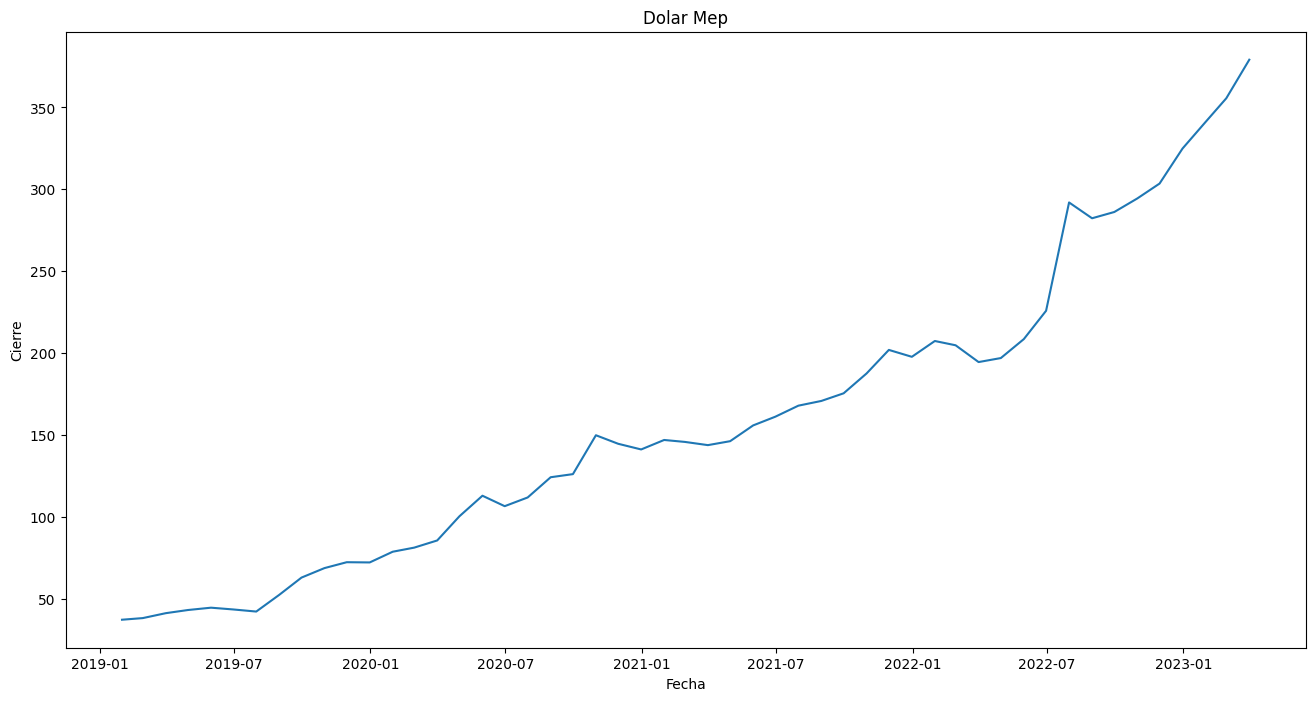

In [38]:
# Create a line chart for dollar_mep_mes, for fecha and cierre.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(dolar_mep_mes_2019_max['cierre'])
plt.title('Dolar Mep')
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.show()

## Dolar oficial

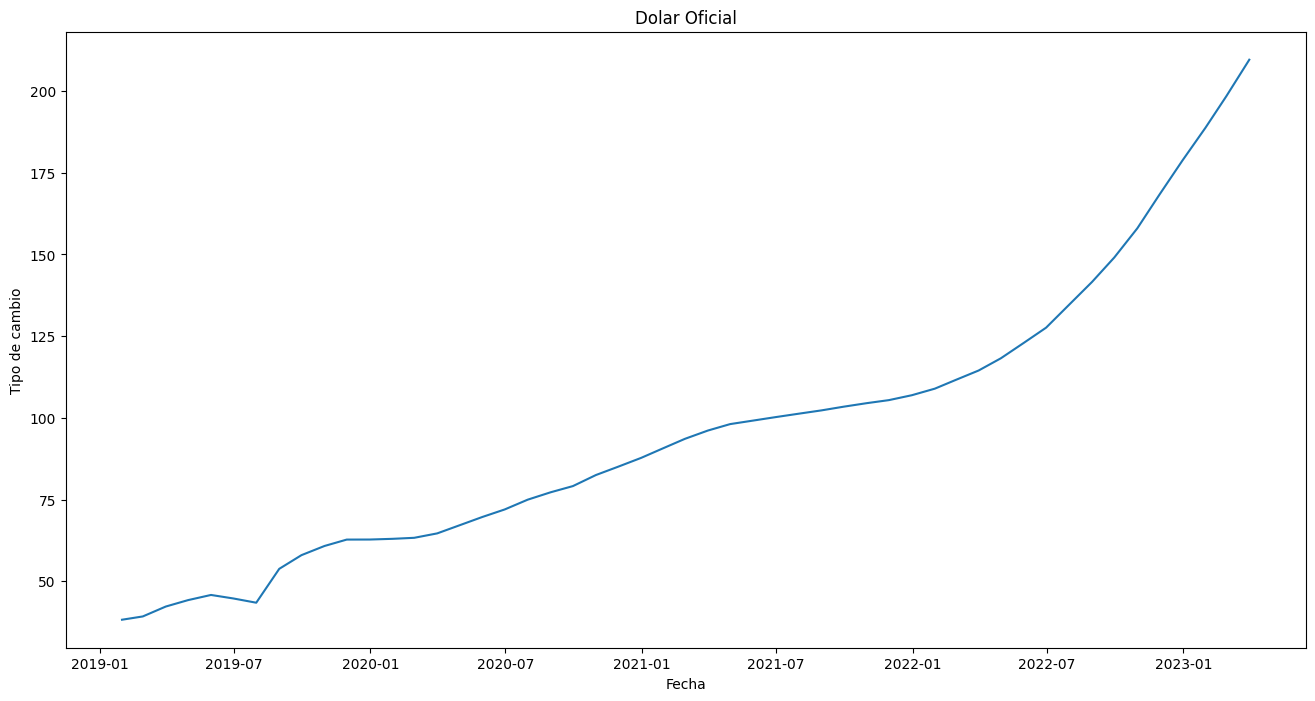

In [39]:
# Create a line chart for dollar_oficial_mes, for fecha and tipo_cambio_bna_vendedor.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(dolar_oficial_mes_2019_max['tipo_cambio_bna_vendedor'])
plt.title('Dolar Oficial')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio')
plt.show()

## Tasa interes

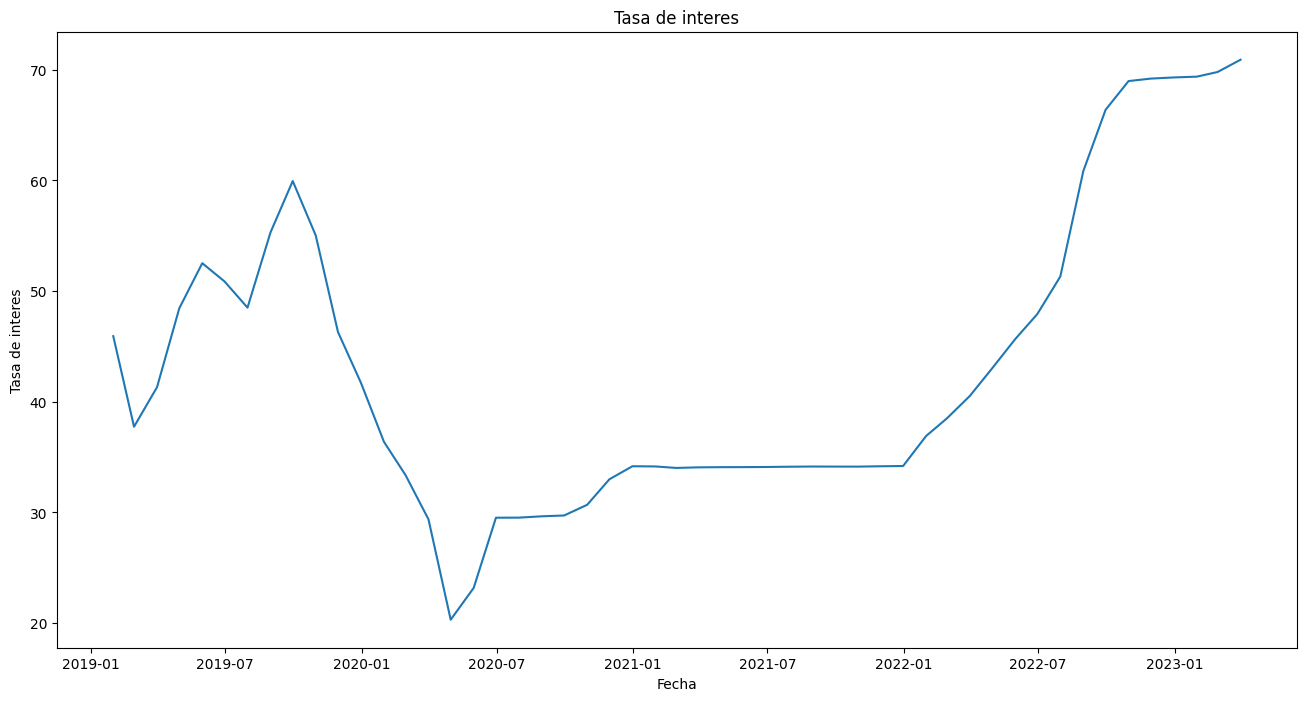

In [40]:
# Create a line chart for tasa_interes_mes, for fecha and tasas_interes_badlar.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(tasa_interes_mes_2019_max['tasas_interes_badlar'])
plt.title('Tasa de interes')
plt.xlabel('Fecha')
plt.ylabel('Tasa de interes')
plt.show()

## Base monetaria

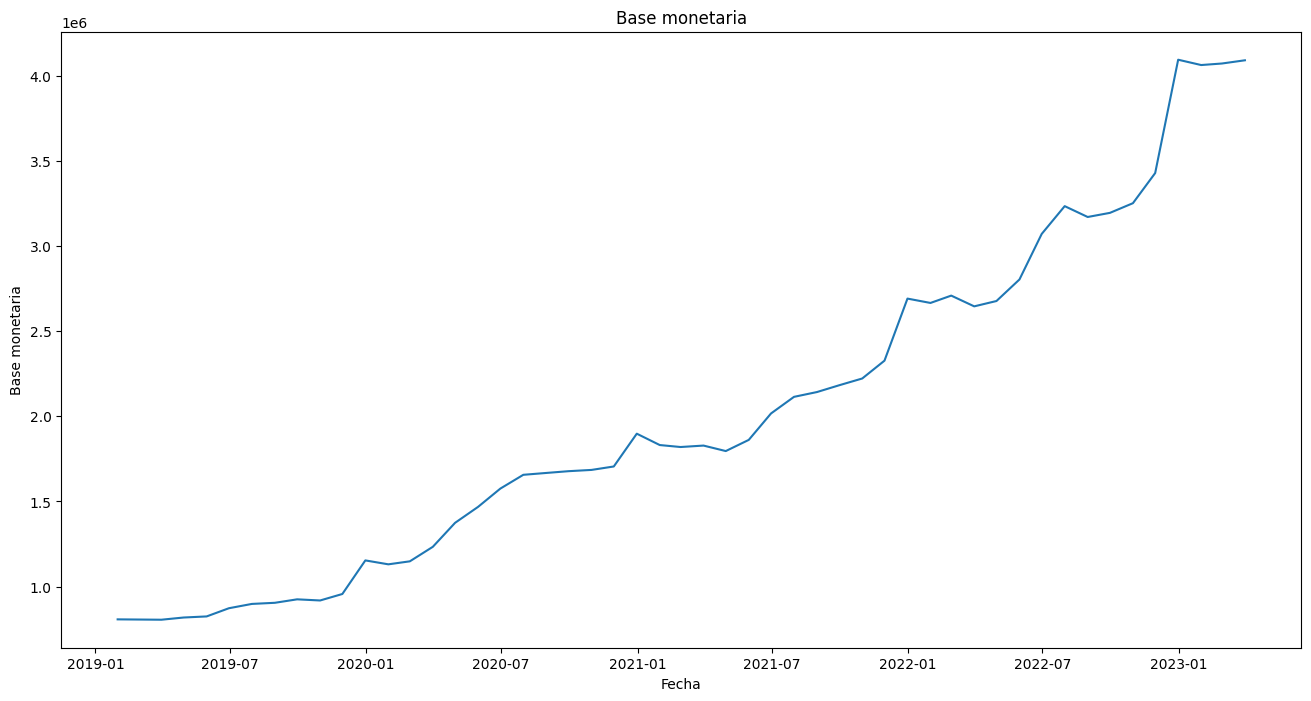

In [41]:
# Create a line chart for series_monetarias_mes, for fecha and base_monetaria.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(series_monetarias_mes_2019_max['agregados_monetarios_en_pesos_bym_totales'])
plt.title('Base monetaria')
plt.xlabel('Fecha')
plt.ylabel('Base monetaria')
plt.show()

## Inflacion

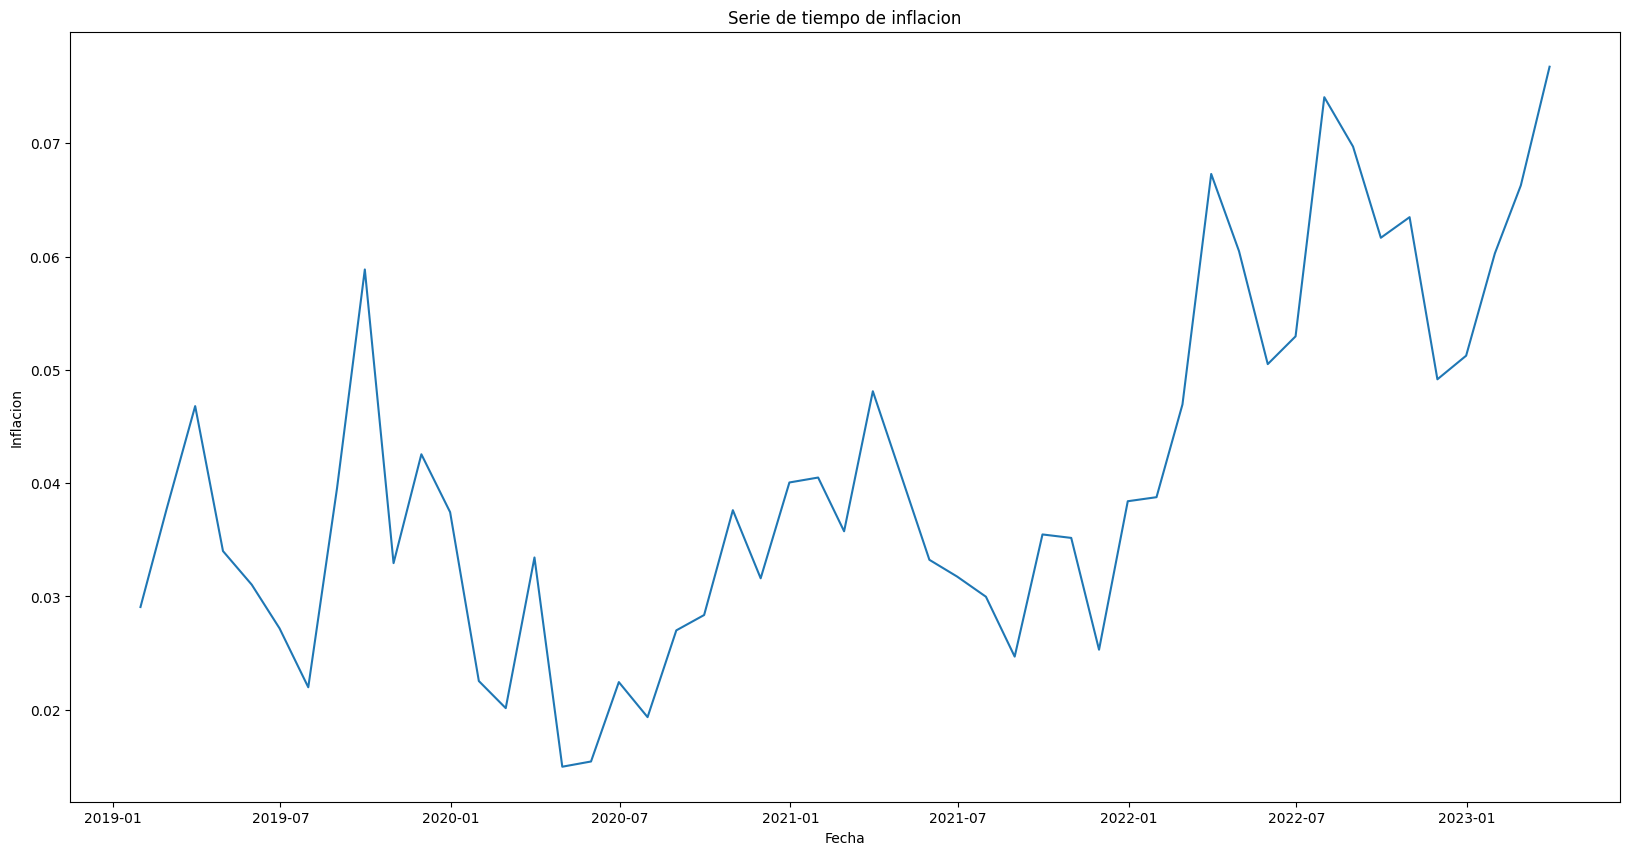

In [45]:
# Create a line chart for inflacion and indice_tiempo.
plt.figure(figsize=(20, 10))
plt.plot(inflacion_2019_max['fecha'], inflacion_2019_max['inflacion_mensual'])
plt.title('Serie de tiempo de inflacion')
plt.xlabel('Fecha')
plt.ylabel('Inflacion')
plt.show()

## All together.

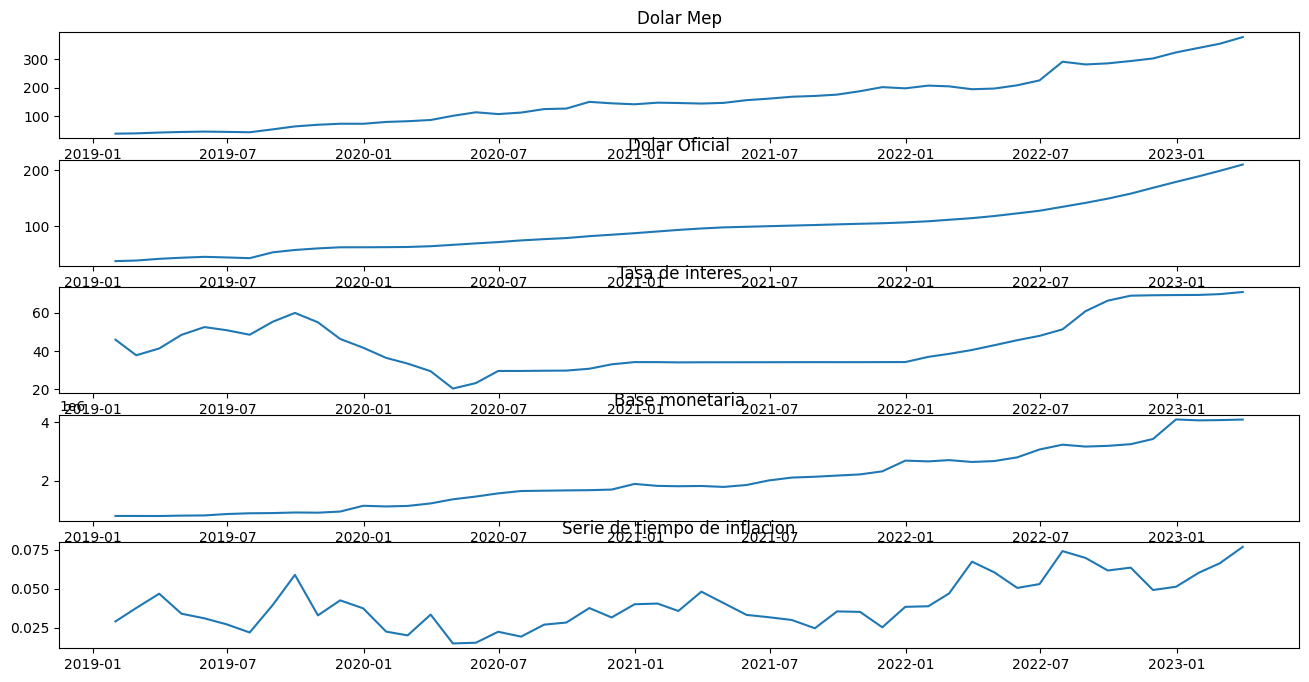

In [47]:
# Make a subplot, with the 5 previous charts.
# Set the size.
fig, axs = plt.subplots(5, figsize=(16, 8))
axs[0].plot(dolar_mep_mes_2019_max['cierre'])
axs[0].set_title('Dolar Mep')
axs[1].plot(dolar_oficial_mes_2019_max['tipo_cambio_bna_vendedor'])
axs[1].set_title('Dolar Oficial')
axs[2].plot(tasa_interes_mes_2019_max['tasas_interes_badlar'])
axs[2].set_title('Tasa de interes')
axs[3].plot(series_monetarias_mes_2019_max['agregados_monetarios_en_pesos_bym_totales'])
axs[3].set_title('Base monetaria')
axs[4].plot(inflacion_2019_max['fecha'], inflacion_2019_max['inflacion_mensual'])
axs[4].set_title('Serie de tiempo de inflacion')
plt.show()

# Joining the data

## dolar_mep

In [48]:
# Rename cierre as value for dolar_mep_mes_2019_max.
# Create a new column called feature = dolar_mep
dolar_mep_final = dolar_mep_mes_2019_max.rename(columns={'cierre': 'value'})
dolar_mep_final['feature'] = 'dolar_mep'

# Scale the data, making value = 100 for the first row, make a new column called value_scaled.
# The rest will be the variation of the value based on the first row.
dolar_mep_final['value_scaled'] = dolar_mep_final['value'] / dolar_mep_final['value'].iloc[0] * 100

# Make a new column called variation.
# The first row will be 0, the rest will be the variation of the value based on the previous row.
dolar_mep_final['variation'] = dolar_mep_final['value_scaled'].pct_change()

# Print the new dataset.
print(dolar_mep_final)

                 value    feature  value_scaled  variation
fecha                                                     
2019-01-31   37.515484  dolar_mep    100.000000        NaN
2019-02-28   38.506786  dolar_mep    102.642381   0.026424
2019-03-31   41.507097  dolar_mep    110.639908   0.077916
2019-04-30   43.439333  dolar_mep    115.790412   0.046552
2019-05-31   44.856452  dolar_mep    119.567834   0.032623
2019-06-30   43.775000  dolar_mep    116.685154  -0.024109
2019-07-31   42.498065  dolar_mep    113.281398  -0.029170
2019-08-31   52.690645  dolar_mep    140.450395   0.239836
2019-09-30   63.212000  dolar_mep    168.495761   0.199682
2019-10-31   69.004839  dolar_mep    183.936955   0.091641
2019-11-30   72.594667  dolar_mep    193.505879   0.052023
2019-12-31   72.457419  dolar_mep    193.140037  -0.001891
2020-01-31   78.989355  dolar_mep    210.551342   0.090149
2020-02-29   81.491379  dolar_mep    217.220654   0.031675
2020-03-31   85.863548  dolar_mep    228.874959   0.0536

## Dolar oficial.

In [56]:
# Rename tipo_cambio_bna_vendedor as value for dolar_oficial_mes_2019_max.
# Create a new column called feature = dolar_oficial.
dolar_oficial_final = dolar_oficial_mes_2019_max.rename(columns={'tipo_cambio_bna_vendedor': 'value'})
dolar_oficial_final['feature'] = 'dolar_oficial'

# Scale the data, making value = 100 for the first row, make a new column called value_scaled.
# The rest will be the variation of the value based on the first row.
dolar_oficial_final['value_scaled'] = dolar_oficial_final['value'] / dolar_oficial_final['value'].iloc[0] * 100

# Rename index to fecha.
dolar_oficial_final.index.names = ['fecha']

# Make a new column called dolar_oficial_variation.
# The first row will be 0, the rest will be the variation of the value based on the previous row.
dolar_oficial_final['variation'] = dolar_oficial_final['value_scaled'].pct_change()

# Print the new dataset.
print(dolar_oficial_final)

                 value        feature  value_scaled  variation
fecha                                                         
2019-01-31   38.248387  dolar_oficial    100.000000        NaN
2019-02-28   39.250000  dolar_oficial    102.618706   0.026187
2019-03-31   42.280645  dolar_oficial    110.542296   0.077214
2019-04-30   44.243333  dolar_oficial    115.673723   0.046420
2019-05-31   45.825806  dolar_oficial    119.811082   0.035767
2019-06-30   44.756667  dolar_oficial    117.015827  -0.023331
2019-07-31   43.451613  dolar_oficial    113.603778  -0.029159
2019-08-31   53.816129  dolar_oficial    140.701695   0.238530
2019-09-30   58.008333  dolar_oficial    151.662169   0.077899
2019-10-31   60.806452  dolar_oficial    158.977819   0.048236
2019-11-30   62.766667  dolar_oficial    164.102780   0.032237
2019-12-31   62.782258  dolar_oficial    164.143544   0.000248
2020-01-31   63.000000  dolar_oficial    164.712828   0.003468
2020-02-29   63.310345  dolar_oficial    165.524221   0

## Tasa interes.

In [50]:
# Rename tasas_interes_badlar as value for tasa_interes_mes_2019_max.
# Create a new column called feature = tasa_interes.
tasa_interes_final = tasa_interes_mes_2019_max.rename(columns={'tasas_interes_badlar': 'value'})
tasa_interes_final['feature'] = 'tasa_interes'

# Scale the data, making value = 100 for the first row, make a new column called value_scaled.
# The rest will be the variation of the value based on the first row.
tasa_interes_final['value_scaled'] = tasa_interes_final['value'] / tasa_interes_final['value'].iloc[0] * 100

# Make a new column called tasa_interes_variation.
# The first row will be 0, the rest will be the variation of the value based on the previous row.
tasa_interes_final['variation'] = tasa_interes_final['value_scaled'].pct_change()

# Print the new dataset.
print(tasa_interes_final)

                value       feature  value_scaled  variation
fecha                                                       
2019-01-31  45.927419  tasa_interes    100.000000        NaN
2019-02-28  37.747768  tasa_interes     82.190048  -0.178100
2019-03-31  41.320565  tasa_interes     89.969271   0.094649
2019-04-30  48.443750  tasa_interes    105.478929   0.172388
2019-05-31  52.522177  tasa_interes    114.359087   0.084189
2019-06-30  50.877083  tasa_interes    110.777144  -0.031322
2019-07-31  48.508065  tasa_interes    105.618964  -0.046564
2019-08-31  55.302419  tasa_interes    120.412643   0.140067
2019-09-30  59.947917  tasa_interes    130.527510   0.084002
2019-10-31  55.030242  tasa_interes    119.820018  -0.082032
2019-11-30  46.304167  tasa_interes    100.820310  -0.158569
2019-12-31  41.709677  tasa_interes     90.816506  -0.099224
2020-01-31  36.383065  tasa_interes     79.218613  -0.127707
2020-02-29  33.387931  tasa_interes     72.697163  -0.082322
2020-03-31  29.387097  t

## Series monetarias.

In [51]:
# Rename agregados_monetarios_en_pesos_bym_totales as value for series_monetarias_mes_2019_max.
# Create a new column called feature = base_monetaria.
base_monetaria_final = series_monetarias_mes_2019_max.rename(columns={'agregados_monetarios_en_pesos_bym_totales': 'value'})
base_monetaria_final['feature'] = 'base_monetaria'

# Scale the data, making value = 100 for the first row, make a new column called value_scaled.
# The rest will be the variation of the value based on the first row.
base_monetaria_final['value_scaled'] = base_monetaria_final['value'] / base_monetaria_final['value'].iloc[0] * 100

# Make a new column called base_monetaria_variation.
# The first row will be 0, the rest will be the variation of the value based on the previous row.
base_monetaria_final['variation'] = base_monetaria_final['value_scaled'].pct_change()

# Print the new dataset.
print(base_monetaria_final)

                value         feature  value_scaled  variation
fecha                                                         
2019-01-31   807110.0  base_monetaria    100.000000        NaN
2019-02-28   806108.8  base_monetaria     99.875952  -0.001240
2019-03-31   804995.0  base_monetaria     99.737954  -0.001382
2019-04-30   817956.0  base_monetaria    101.343807   0.016101
2019-05-31   824343.0  base_monetaria    102.135149   0.007808
2019-06-30   872460.0  base_monetaria    108.096790   0.058370
2019-07-31   897800.0  base_monetaria    111.236387   0.029044
2019-08-31   904438.0  base_monetaria    112.058827   0.007394
2019-09-30   924758.0  base_monetaria    114.576452   0.022467
2019-10-31   918027.0  base_monetaria    113.742489  -0.007279
2019-11-30   956135.0  base_monetaria    118.464026   0.041511
2019-12-31  1153405.0  base_monetaria    142.905552   0.206320
2020-01-31  1130395.0  base_monetaria    140.054639  -0.019950
2020-02-29  1148044.0  base_monetaria    142.241330   0

## Inflacion.

In [58]:
# Rename inflacion as value for inflacion_2019_max.
# Create a new column called feature = inflacion.
inflacion_final = inflacion_2019_max.rename(columns={'ipc_nivel_general_nacional': 'value'})
inflacion_final['feature'] = 'inflacion'

# Drop inflacion.
inflacion_final = inflacion_final.drop(columns=['inflacion_mensual'])

# Scale the data, making value = 100 for the first row, make a new column called value_scaled.
# The rest will be the variation of the value based on the first row.
inflacion_final['value_scaled'] = inflacion_final['value'] / inflacion_final['value'].iloc[0] * 100

# Make a new column called inflacion_variation.
# The first row will be 0, the rest will be the variation of the value based on the previous row.
inflacion_final['variation'] = inflacion_final['value_scaled'].pct_change()

# Transform fecha to the index.
inflacion_final.set_index('fecha', inplace=True)

# Print the new dataset.
print(inflacion_final)

                  value    feature  value_scaled  variation
fecha                                                      
2019-01-31   189.610100  inflacion    100.000000        NaN
2019-02-28   196.750100  inflacion    103.765622   0.037656
2019-03-31   205.957100  inflacion    108.621376   0.046795
2019-04-30   212.959641  inflacion    112.314503   0.034000
2019-05-31   219.569100  inflacion    115.800319   0.031036
2019-06-30   225.537000  inflacion    118.947778   0.027180
2019-07-31   230.494000  inflacion    121.562090   0.021979
2019-08-31   239.607700  inflacion    126.368638   0.039540
2019-09-30   253.710200  inflacion    133.806269   0.058857
2019-10-31   262.066100  inflacion    138.213154   0.032935
2019-11-30   273.215800  inflacion    144.093484   0.042545
2019-12-31   283.444200  inflacion    149.487923   0.037437
2020-01-31   289.829900  inflacion    152.855729   0.022529
2020-02-29   295.666000  inflacion    155.933677   0.020136
2020-03-31   305.551500  inflacion    16

In [54]:
dolar_mep_mes_2019_max
print(dolar_oficial_mes_2019_max.index.max())
print(tasa_interes_mes_2019_max.index.max())
print(series_monetarias_mes_2019_max.index.max())
print(inflacion_2019_max.fecha.max())

2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00


## New dataframe

In [60]:
# Join the 5 dataframes into one, using fecha as join key.
final_df = pd.concat([dolar_mep_final, dolar_oficial_final, tasa_interes_final, base_monetaria_final, inflacion_final])

# Sort by fecha.
final_df.sort_values(by=['fecha'], inplace=True)

# Print the new dataframe.
print(final_df)

                   value         feature  value_scaled  variation
fecha                                                            
2019-01-31  3.751548e+01       dolar_mep    100.000000        NaN
2019-01-31  4.592742e+01    tasa_interes    100.000000        NaN
2019-01-31  8.071100e+05  base_monetaria    100.000000        NaN
2019-01-31  1.896101e+02       inflacion    100.000000        NaN
2019-01-31  3.824839e+01   dolar_oficial    100.000000        NaN
...                  ...             ...           ...        ...
2023-03-31  2.095806e+02   dolar_oficial    547.946361   0.056345
2023-03-31  4.091246e+06  base_monetaria    506.900670   0.004643
2023-03-31  3.790895e+02       dolar_mep   1010.488221   0.066119
2023-03-31  7.090726e+01    tasa_interes    154.389816   0.015909
2023-03-31  1.381160e+03       inflacion    728.421165   0.076752

[255 rows x 4 columns]


<Axes: xlabel='fecha', ylabel='value_scaled'>

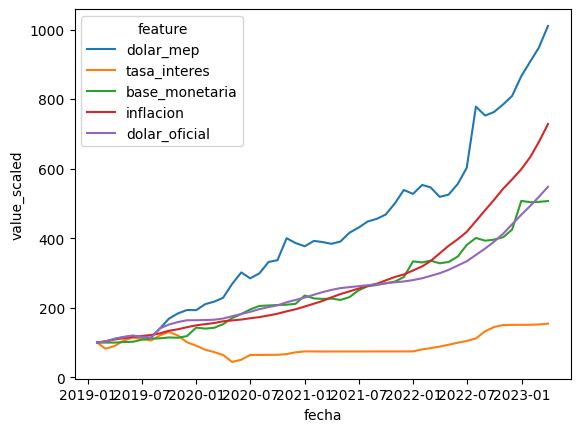

In [61]:
# Plot value scaled as y, use x as fecha, use feature as hue.
sns.lineplot(data=final_df, x='fecha', y='value_scaled', hue='feature')

# Linear Regresor

In [78]:
# Pivot the dataset, over fecha and feature.
final_df_transposed = final_df.reset_index().pivot(index='fecha', columns='feature', values='value_scaled')

# Print the head of the new dataframe.
final_df_transposed.tail()

feature,base_monetaria,dolar_mep,dolar_oficial,inflacion,tasa_interes
fecha,,,,,
2022-11-30,424.829205,809.122419,440.149279,569.209499,150.677056
2022-12-31,507.315608,866.107715,467.445391,598.379253,150.904302
2023-01-31,503.445255,909.214885,493.611369,634.448798,151.057946
2023-02-28,504.557867,947.819013,518.719352,676.498298,151.972125
2023-03-31,506.900670,1010.488221,547.946361,728.421165,154.389816


In [81]:
# Fit a linear regressor, using dolar_mep as y, and the rest of the features as X.
# Split the data into training and test sets, using 80% of the data for training.
# Use random_state = 42.
X = final_df_transposed.drop(columns=['dolar_mep'])
y = final_df_transposed['dolar_mep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

# Print the coefficients with their corresponding feature.
print(list(zip(X.columns, reg.coef_)))
print(reg.intercept_)
print(reg.score(X_test, y_test))

# Predict the y values for the test set.
y_pred = reg.predict(X_test)

# Print the mean squared error.
print(mean_squared_error(y_test, y_pred))

# Print the root of the mean squared error.
print(np.sqrt(mean_squared_error(y_test, y_pred)))

[('base_monetaria', 0.8881588514497073), ('dolar_oficial', 1.105006929775542), ('inflacion', 0.11793560095165101), ('tasa_interes', -0.37911132537810793)]
-74.35725787188005
0.9867313581395714
580.1370733856207
24.08603482073421


In [82]:
# Fit a linear regressor, using dolar_mep as y, and the rest of the features as X.
# Split the data into training and test sets, using 80% of the data for training.
# Use random_state = 42.
X = final_df_transposed.drop(columns=['dolar_mep', 'dolar_oficial'])
y = final_df_transposed['dolar_mep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

# Print the coefficients with their corresponding feature.
print(list(zip(X.columns, reg.coef_)))
print(reg.intercept_)
print(reg.score(X_test, y_test))

# Predict the y values for the test set.
y_pred = reg.predict(X_test)

# Print the mean squared error.
print(mean_squared_error(y_test, y_pred))

# Print the root of the mean squared error.
print(np.sqrt(mean_squared_error(y_test, y_pred)))

[('base_monetaria', 1.0224667196139043), ('inflacion', 0.8103380116355191), ('tasa_interes', -0.8063113351834497)]
19.679404190247453
0.9829050051448444
747.4344691139195
27.33924777886033


In [85]:
# Fit a linear regressor, using dolar_mep as y, and the rest of the features as X.
# Split the data into training and test sets, using 80% of the data for training.
# Use random_state = 42.
X = final_df_transposed.drop(columns=['dolar_mep', 'dolar_oficial', 'inflacion'])
y = final_df_transposed['dolar_mep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

# Print the coefficients with their corresponding feature.
print(list(zip(X.columns, reg.coef_)))
print(reg.intercept_)
print(reg.score(X_test, y_test))

# Predict the y values for the test set.
y_pred = reg.predict(X_test)

# Print the mean squared error.
print(mean_squared_error(y_test, y_pred))

# Print the root of the mean squared error.
print(np.sqrt(mean_squared_error(y_test, y_pred)))

[('base_monetaria', 1.974229112364347), ('tasa_interes', 0.17066698996757654)]
-87.52826674616153
0.98376433607817
709.8624449404348
26.643243889219548


In [88]:
# Fit a linear regressor, using dolar_mep as y, and the rest of the features as X.
# Split the data into training and test sets, using 80% of the data for training.
# Use random_state = 42.
X = final_df_transposed.drop(columns=['dolar_mep', 'dolar_oficial', 'inflacion', 'tasa_interes'])
y = final_df_transposed['dolar_mep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

# Print the coefficients with their corresponding feature.
print(list(zip(X.columns, reg.coef_)))
print(reg.intercept_)
print(reg.score(X_test, y_test))

# Predict the y values for the test set.
y_pred = reg.predict(X_test)

# Print the mean squared error.
print(mean_squared_error(y_test, y_pred))

# Print the root of the mean squared error.
print(np.sqrt(mean_squared_error(y_test, y_pred)))

[('base_monetaria', 1.994305357158182)]
-76.36682897372788
0.9822995400170109
773.906867042293
27.819181638615703


# Correlation

In [84]:
# Get the correlation for the features for the final dataframe.
correlation = final_df_transposed.corr()

correlation

feature,base_monetaria,dolar_mep,dolar_oficial,inflacion,tasa_interes
feature,,,,,
base_monetaria,1.000000,0.989127,0.981093,0.972521,0.514629
dolar_mep,0.989127,1.000000,0.988978,0.975776,0.528585
dolar_oficial,0.981093,0.988978,1.000000,0.985816,0.571934
inflacion,0.972521,0.975776,0.985816,1.000000,0.662192
tasa_interes,0.514629,0.528585,0.571934,0.662192,1.000000


# Conclusion

The base monetaria is a good predictor for the dolar mep. Anyways further analysis would be add value to the predictor. <br>
A good ideas would be to add some moving average of the predictor or past value, as base_monetaria -1 -2 -3, referring to previous months. <br>
This is because in economy many variables have retarded efects more than instantaneous effects, even in countries with high speed of circulation and with customs of high inflation, having past month data will add more insights about the dolar mep values.